# 如何畫出一張RGB構成的圖片
  * 匯入圖片 CV2
  * 畫出單張圖 plt
  * 畫出多張圖 subplot
  * 在圖中畫出一個紅色框框 patches.Rectangle
  * 畫出單張圖中的部份(方法一)  直接座標法
  * 畫出單張圖中的部份(方法二)  bitmask
  * 畫出單張圖中的部份(方法二)  bitmask + 始用原始圖片比例
  * 畫出單張圖中的部份(方法三)  np.indices


# 匯入圖片 by CV2

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('gundam1.jpg')
img.shape

(500, 636, 3)

# 畫出單張圖 plt

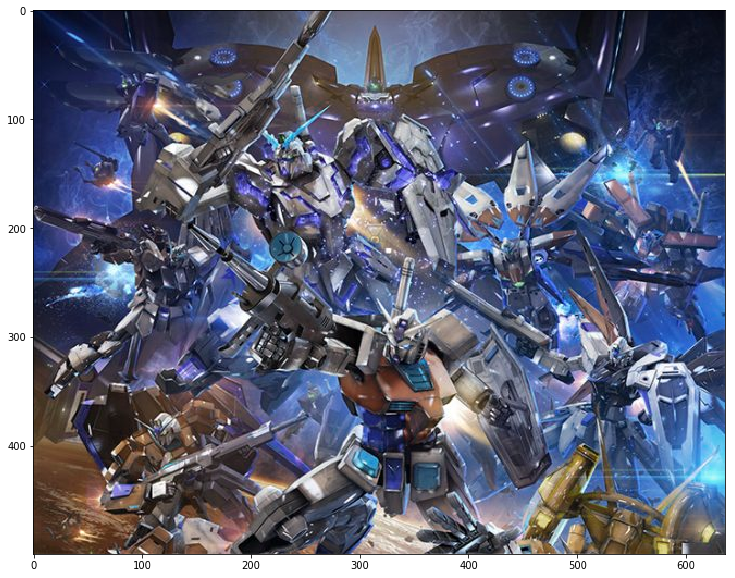

In [3]:
plt.figure(figsize=(15, 10)) # 指定繪出的圖的大小
dsp = plt.imshow(img)

# 畫出多張圖 subplot
 各種subplot demo : https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html

In [4]:
img1 = cv2.imread('gundam1.jpg')
img2 = cv2.imread('gundam2.jpg')

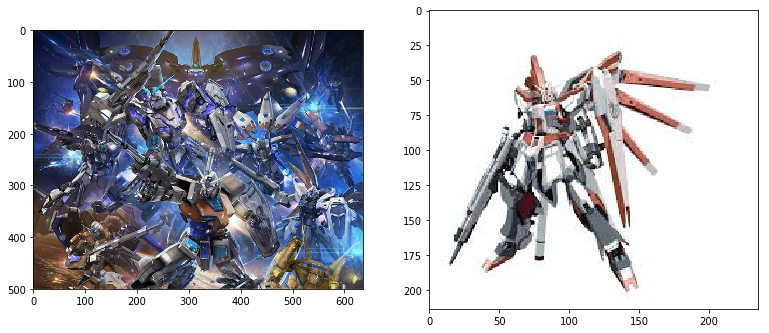

In [5]:
plt.figure(figsize=(13, 6))
ax = plt.subplot(1,2,1); ax.imshow(img1)
ax = plt.subplot(1,2,2); ax.imshow(img2)

# 在圖中畫出一個紅色框框 patches.Rectangle
<b>(啟始點x, 啟始點y>, 長度x, 長度y</b><br>
最重要的是要<font color='red'>import matplotlib.patches as patches</font>

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
img1 = cv2.imread('gundam1.jpg')

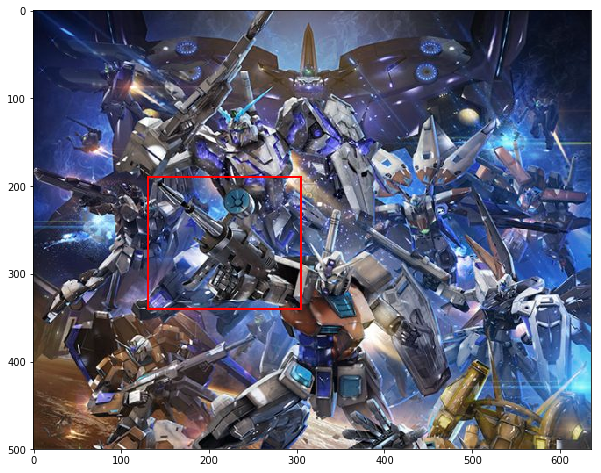

In [7]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)

rec_red  = patches.Rectangle((130,190),175,150,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rec_red)

ax.imshow(img1)

# 畫出單張圖中的部份(方法一)  直接座標法

<b>畫出紅色矩行部份</b>

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
img1 = cv2.imread('gundam1.jpg')

<b> img1[ y軸, x軸, z軸]</b><br>

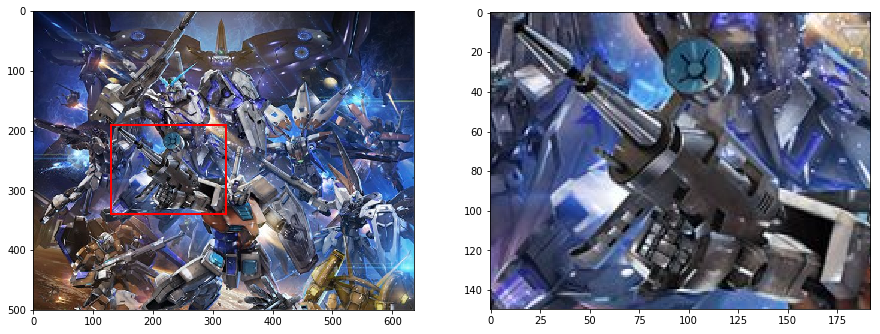

In [9]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1)
rec_red  = patches.Rectangle((130,190),192,150,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rec_red)
ax.imshow(img1)

ax = plt.subplot(1,2,2)
x_beg,y_beg = [130,190]  # s1=(130,190)
x_end,y_end = [322,340]  # s2=(322,340)

#322-130= 192 當初設計好的紅色框框 y軸 長度
#340-190= 150 當初設計好的紅色框框 y軸 長度

ax.imshow(img1[y_beg:y_end,x_beg:x_end,:])



# 畫出單張圖中的部份(方法二)  bitmask
<b>邏邏是造出與遠始圖片同等大小np.zero陣列, 將要保留的位置改成True</b><br>
<b>重點是被<font color='red'>bitmask重新運算後的結果是1d一定要reshape回3d</font></b>


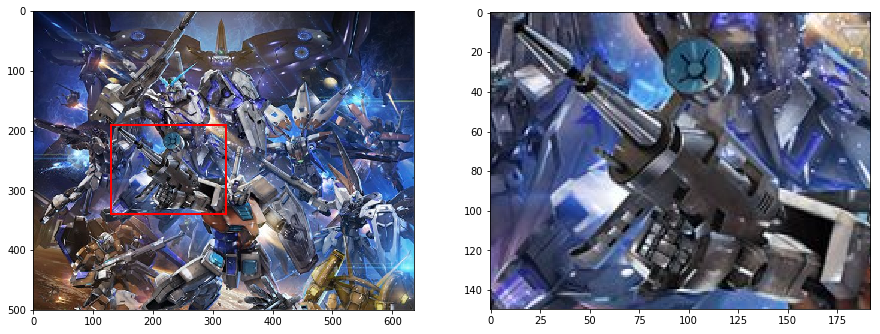

In [10]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1)
rec_red  = patches.Rectangle((130,190),192,150,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rec_red)
ax.imshow(img1)

ax = plt.subplot(1,2,2)
x_beg,y_beg = [130,190]  # s1=(130,190)
x_end,y_end = [322,340]  # s2=(322,340)

bmask = np.zeros(img1.shape,dtype='bool')
bmask[y_beg:y_end,x_beg:x_end,:] = True
ax.imshow(img1[bmask].reshape(y_end-y_beg,x_end-x_beg,3))

# 畫出單張圖中的部份(方法二) bitmask + 始用原始圖片比例
<b>recx, recy, width, high = [370,250,int(200*xy_rate),200]</b><br>
recx = 370 數學上的x軸座標, 不是陣列<br>
recy = 250 數學上的y軸座標<br>
使用上只要修改紅色部份就好, 即
 - 決定啟始點 x, y
 - 決定高度 high

recx, recy, width, high = [<font color='red'>370</font>,<font color='red'>250</font>,int(<font color='red'>200</font>*xy_rate),<font color='red'>200</font>]

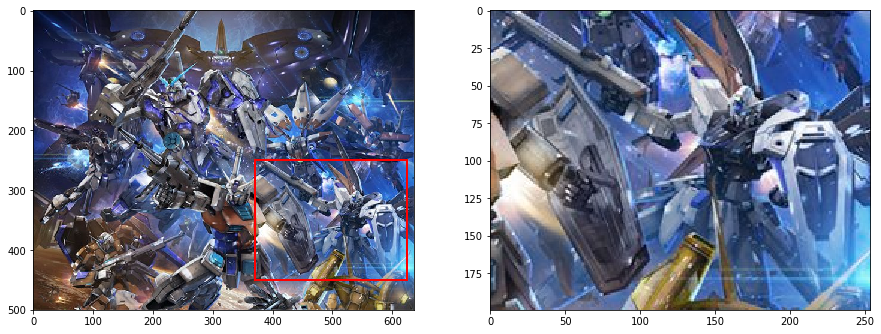

In [11]:
# 取得原始圖片的 x軸 y軸 的比例
xy_rate = img.shape[1]/img.shape[0]  # img.shape[0] y長度
#recx, recy, width, high = [130,190,int(150*xy_rate),150]
recx, recy, width, high = [370,250,int(200*xy_rate),200]
plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1)
rec_red  = patches.Rectangle((recx,recy),width,high,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rec_red)
ax.imshow(img1)

ax = plt.subplot(1,2,2)
x_beg,y_beg = [recx,recy]  # s1=(130,190)
x_end,y_end = [recx+width,recy+high]  # s2=(322,340)

bmask = np.zeros(img1.shape,dtype='bool')
bmask[y_beg:y_end,x_beg:x_end,:] = True
ax.imshow(img1[bmask].reshape(y_end-y_beg,x_end-x_beg,3))

# 畫出單張圖中的部份(方法三) np.indices

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
img1 = cv2.imread('gundam1.jpg')

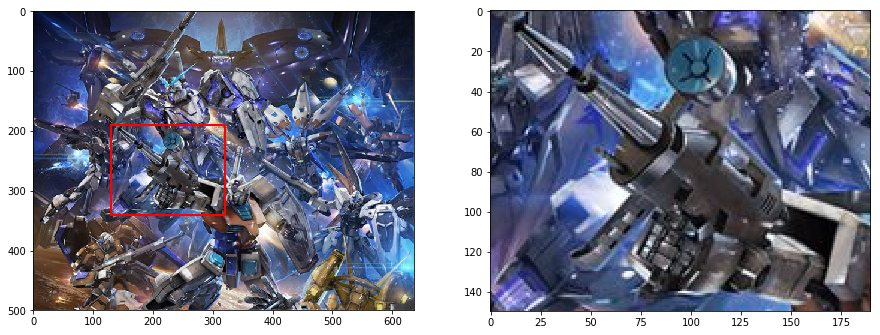

In [13]:
# 取得原始圖片的 x軸 y軸 的比例
xy_rate = img.shape[1]/img.shape[0]  # img.shape[0] y長度
recx, recy, width, high = [130,190,int(150*xy_rate),150]
plt.figure(figsize=(15,10))

ax = plt.subplot(1,2,1)
rec_red  = patches.Rectangle((recx,recy),width,high,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rec_red)
ax.imshow(img1)

ax = plt.subplot(1,2,2)
row, col = np.indices((high,width))

ax.imshow(img1[recy+row,recx+col,:])